### Skewness and Kurtosis 

<img src="normal.png" width="600" height="400">


 چولگی معیاری برای عدم تقارن توزیع احتمال یک متغیر تصادفی با نسبت به میانگین آن است. می تواند مثبت یا منفی یا تعریف نشده باشد.

 چولگی منفی نشان می دهد که دم در سمت چپ توزیع است ، و چولگی مثبت نشان می دهد که دم در سمت راست است. 

رابطه چولگی عبارت است از:
$$
S(X) := \frac{\mathbb{E}(X - \mathbb{E}(X)^3)}{\sigma^3},
$$

<img src="skew.png" width="600" height="400">

**کشیدگی** معیاری است برای **بلندی** توزیع احتمال یک متغیر تصادفی با ارزش واقعی، یعنی توصیف کننده شکل یک توزیع احتمال است.

رابطه کشیدگی عبارت است از
$$
K(X) := \frac{\mathbb{E}(X - \mathbb{E}(X)^4)}{\sigma^4},
$$

<img src="kurtosis.png" width="600" height="400">


**If $X$ is a Gaussian random variable ====> $S(X) = 0$ and $K(X)=3$.**



#### Examples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# برای رسم نمودار ها از این استایل استفاده میکنیم
plt.style.use("seaborn-dark") 

In [3]:
import Maktab_S_J as msj

In [4]:
#add to msj


def get_ffme_returns():

    rets = pd.read_csv("Portfolios_Formed_on_monthly.csv", index_col=0, parse_dates=True, na_values=-99.99)
    rets = rets[["Lo 10", "Hi 10"]] / 100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period("M")
    return rets 

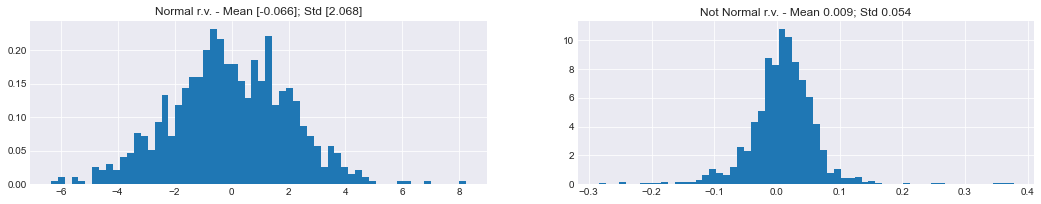

In [8]:
# متغیر تصادفی توزیع شده نرمال با میانگین 0 و انحراف معیار 2
A = pd.DataFrame( {"A" : np.random.normal(0, 2, size=800)} )

# بازده ها از دیتاست فاما-فرنچ که ما میدانیم که نرمال نیستند.
B = msj.get_ffme_returns()
B = B["Hi 10"]

f = plt.figure(figsize=(18,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.hist( A.values ,bins=60, density=True )
ax1.set_title('Normal r.v. - Mean {}; Std {}' .format(A.mean().values.round(3),A.std().values.round(3)))
ax1.grid()

ax2.hist( B.values ,bins=60, density=True )
ax2.set_title('Not Normal r.v. - Mean {}; Std {}' .format(np.round(B.mean(),3), np.round(B.std(),3) ))
ax2.grid()

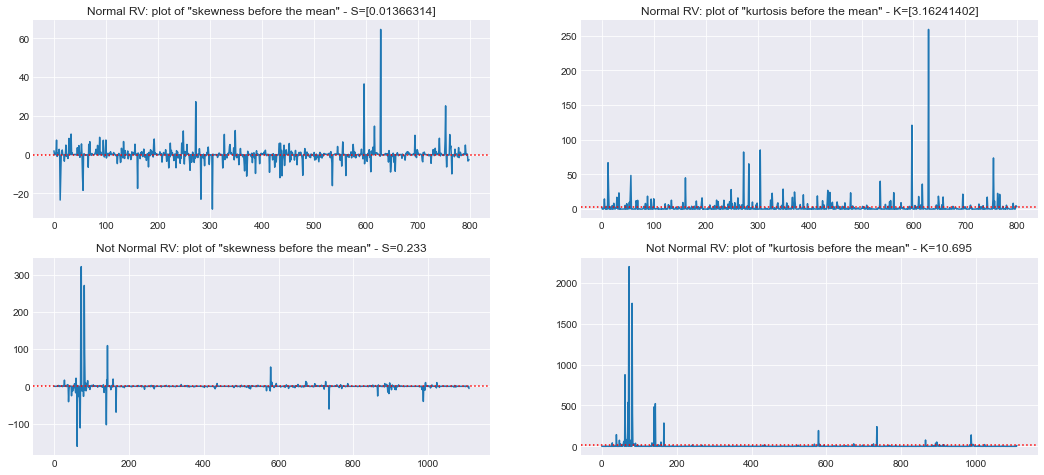

In [9]:
# Skewness of A and B
S_A = ( (A - A.mean())**3 / A.std(ddof=0)**3 ).mean() 
K_A = ( (A - A.mean())**4 / A.std(ddof=0)**4 ).mean() 

S_B = ( (B - B.mean())**3 / B.std(ddof=0)**3 ).mean()
K_B = ( (B - B.mean())**4 / B.std(ddof=0)**4 ).mean()

f = plt.figure(figsize=(18,8))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.plot( ((A - A.mean())**3 / A.std(ddof=0)**3).values  )
ax1.set_title('Normal RV: plot of "skewness before the mean" - S={}' .format(S_A.values) )
ax1.axhline(y=S_A[0], linestyle=":", color="red")
ax1.grid()

ax2.plot( ((A - A.mean())**4 / A.std(ddof=0)**4).values  )
ax2.set_title('Normal RV: plot of "kurtosis before the mean" - K={}' .format(K_A.values) )
ax2.axhline(y=K_A[0], linestyle=":", color="red")
ax2.grid()

ax3.plot( ((B - B.mean())**3 / B.std(ddof=0)**3).values  )
ax3.set_title('Not Normal RV: plot of "skewness before the mean" - S={}' .format(np.round(S_B,3)) )
ax3.axhline(y=S_B, linestyle=":", color="red")
ax3.grid()

ax4.plot( ((B - B.mean())**4 / B.std(ddof=0)**4).values  )
ax4.set_title('Not Normal RV: plot of "kurtosis before the mean" - K={}' .format(np.round(K_B,3)) )
ax4.axhline(y=K_B, linestyle=":", color="red")
ax4.grid()

اجازه دهید یک مجموعه داده دیگر که مربوط به شاخص های یک صندوق هج فاند است را بارگذاری کنیم:

In [10]:
hfi = pd.read_csv("hedgefundindices.csv", index_col=0, na_values=-99.99) / 100.0
hfi

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
31/01/1997,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
28/02/1997,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
31/03/1997,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
30/04/1997,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
31/05/1997,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/07/2018,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
31/08/2018,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
30/09/2018,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [ ]:
#add to msj

def get_hfi_returns():
    '''
    نرخ بازده هج فاند را بر می گرداند
    '''

    hfi = pd.read_csv("hedgefundindices.csv", index_col=0, parse_dates=True, na_values=-99.99) / 100.0
    return hfi 

In [14]:
hfi = msj.get_hfi_returns()
hfi.head(10)

C:\Users\Lenovo L3\AppData\Roaming\Python\Python310\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/01/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Lenovo L3\AppData\Roaming\Python\Python310\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '28/02/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Lenovo L3\AppData\Roaming\Python\Python310\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '31/03/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Lenovo L3\AppData\Roaming\Python\Python310\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30/04/1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
1997-06-30,0.0212,0.0085,0.0217,0.0581,0.0165,0.0258,0.0108,0.0218,0.0223,0.0231,0.0198,-0.0065,0.0225
1997-07-31,0.0193,0.0591,0.0234,0.0560,0.0247,0.0307,0.0095,0.0738,0.0454,0.0200,0.0181,-0.0429,0.0435
1997-08-31,0.0134,-0.0473,0.0147,-0.0066,0.0017,0.0071,0.0087,-0.0180,0.0107,0.0079,0.0103,-0.0072,0.0051
1997-09-30,0.0122,0.0198,0.0350,0.0229,0.0202,0.0329,0.0119,0.0290,0.0429,0.0197,0.0183,-0.0155,0.0334


In [15]:
hfi.index

DatetimeIndex(['1997-01-31', '1997-02-28', '1997-03-31', '1997-04-30',
               '1997-05-31', '1997-06-30', '1997-07-31', '1997-08-31',
               '1997-09-30', '1997-10-31',
               ...
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=263, freq=None)

In [ ]:
def skewness(s):
    '''
    scipy.stats.skew() ===> همچنین از این تابع می توان استفاده کرد
    '''
    return ( ((s - s.mean()) / s.std(ddof=0))**3 ).mean()

def kurtosis(s):
    '''
    scipy.stats.kurtosis() ===> همچنین از این تابع می توان استفاده کرد
   "Excess Kurtosis" ====> کشیدگی منهای 3
    '''
    return ( ((s - s.mean()) / s.std(ddof=0))**4 ).mean()

In [18]:
hfi_skew_kurt = pd.DataFrame(columns=["Skewness","Kurtosis"])


# skewness
hfi_skew_kurt["Skewness"] = hfi.aggregate( msj.skewness )

# kurtosis
hfi_skew_kurt["Kurtosis"] = hfi.aggregate( msj.kurtosis )

hfi_skew_kurt

,Skewness,Kurtosis
Convertible Arbitrage,-2.639592,23.280834
CTA Global,0.173699,2.952960
Distressed Securities,-1.300842,7.889983
Emerging Markets,-1.167067,9.250788
Equity Market Neutral,-2.124435,17.218555
Event Driven,-1.409154,8.035828
Fixed Income Arbitrage,-3.940320,29.842199
Global Macro,0.982922,5.741679
Long/Short Equity,-0.390227,4.523893
Merger Arbitrage,-1.320083,8.738950


کدام شاخص، کم و بیش، توزیع گاوسی دارد؟

**CTA Global** ==> به نظر می رسد دارای چولگی نزدیک به صفر و کشیدگی نزدیک به 3 است.


همچنین:

**Jarque-Bera test** ===> ما می توانیم از تستی به نام آزمون **چارک-برا** استفاده کنیم.


In [ ]:
#add to msj

import scipy.stats
def is_normal(s, level=0.01):
    '''
    آزمایش چارک-برا برای دیدن اینکه آیا یک سری بازده دارای توزیع نرمال است یا خیر.
    تست به طور پیش فرض در سطح 1% اعمال می شود
    '''
    statistic, pvalue = scipy.stats.jarque_bera( s )
    return pvalue > level

In [20]:
# For example:
print( scipy.stats.jarque_bera( hfi["CTA Global"] ) )
print("-----------------------------")
print( msj.is_normal( hfi["CTA Global"] ) )

Jarque_beraResult(statistic=1.3467529104392226, pvalue=0.5099837302620382)
-----------------------------
True


In [21]:
# در حالی که:
print( scipy.stats.jarque_bera( hfi["Convertible Arbitrage"] ) )
print("-----------------------------")
print( msj.is_normal(  hfi["Convertible Arbitrage"] ) )

Jarque_beraResult(statistic=4812.703130094962, pvalue=0.0)
-----------------------------
False


In [22]:
hfi.aggregate( msj.is_normal )

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

همان طور که میبینیم فقط یک شاخص دارای توزیع نرمال است.

## Testing  SmallCap and Large Cap returns for Normality

بیایید بررسی کنیم که آیا هر یک از بازده هایی که تاکنون مطالعه کرده ایم، از فرضیه نرمال بودن پیروی می کند یا خیر.

In [23]:
ffme = msj.get_ffme_returns()
msj.skewness(ffme)

Lo 10    4.410739
Hi 10    0.233445
dtype: float64

In [24]:
msj.kurtosis(ffme)

Lo 10    46.845008
Hi 10    10.694654
dtype: float64

In [26]:
ffme.aggregate( msj.is_normal )

Lo 10    False
Hi 10    False
dtype: bool